# Markdown cheatsheet :

## Summary
- ">" Gives Indentation
-  "- " Gives bullets
- **text**  "**<>**"makes text bold
- *italic* "*<>*" makes italic

## Yet to Learn on numpy - indexing ,slicing ,iterating  ,stacking arrays 





In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_datareader.data as web
df = web.DataReader('AAPL','yahoo','2020/4/17','2020/04/22')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-17,286.950012,276.859985,284.690002,282.799988,53812500,282.799988
2020-04-20,281.679993,276.850006,277.950012,276.929993,32503800,276.929993
2020-04-21,277.250000,265.429993,276.279999,268.369995,45247900,268.369995
2020-04-22,277.899994,272.200012,273.609985,276.100006,29264300,276.100006


 ## df.describe Gives the mean,median,std count and others 

## <font color="red">Options while importing the data into DataFrames<font/>
- na_values - replaces the mentioned values to NaN is all columns/rows
- if na_values passed as dictonary then replaces as said for each column
- Converters with functions where values can be replaced by return value from functions,converters are passed as dictionaries
- can parse values while reading  like date can be parsed as parse_dates=['Column_name']


In [153]:
%time df_cons =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\consumption.csv",na_values=['-'])

Wall time: 16 ms


### - Default index is always given to a dataframe
- We can change the index using df.set_index("Column") we want and by using inplace the dataframe is updated else new dataframe will created but wont be updated on the existing
- We can use df.loc['Column Valiue and not coulmn name '] to get the value at that particular index 
- We can reset the index back using df.reset_index(inplace=true)

In [144]:
df_cons.set_index('Area',inplace= True)

In [154]:
df_cons[32:37] # Index is updated to Area column

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh
32,Westminster,2017,Domestic,Electricity,2017,4.912696e+08
33,Unapportioned,2017,Domestic,Electricity,2017,NaN
34,London,2017,Domestic,Electricity,2017,1.279122e+10
35,Barking and Dagenham,2017,Domestic,Gas,2017,7.854592e+08
36,Barnet,2017,Domestic,Gas,2017,2.252750e+09


In [146]:
df_cons.reset_index(inplace= True) # index has been reset to normal old one 

## <font color="Blue">Ways to create a dataframe<font/>
1. from CSV # syntax is pd.read_csv("File path")
2. from Excel # df = pd.read_excel("filename.xlsx","sheet1")
3. from Dictionary 
4. from tuple
5. from list 
    
### Note: there are many more ways to create/read the data to dataframes , look for pandas IO for various options
    
> syntax to create the dataframe  df = pd.DataFrame("Pass name of the dictionary/List/Tuple")

## Options while reading the csv into dataframes
- we can skiprow = 1 /header = 1(1 is index position) option to skips some set of rows while reading the csv/excel
- when we dont have headers we can add names= ['Coulmn1','coulmn2','Coulmn3'] with headers= none as we dont have headers
- we can read partial file if its too big  by using nrows = 5


# Best way of cleaning data while importing data is 
> Say we have various values like "Not available" ,"n/a"  null  or any kind of string which is either not useful else its like NaN value (null value) we can use a parameter like na_values= ['Not available','N/A','-','0'] ,this opton replace all the following values into NaN from any column /Row

> But the above option will replace everything row/coumn which sometimes may not be correct, so we can do the same with dictionaries where  conversion /cleaning data be can be done column base - syntax like  na_values = { 'column1':['Not available','N/A','-'],'Column2':['Not available','N/A','-','-1']} - by using this method column1 will be checked aganist the given values and column2 respectively and replace /filled /cleared




## Reading the excel/csv file and using convertors while reading the file 

> Note : if we need to write the 2 or more dataframes to excel then we can use "pd.excelwriter" option 


In [166]:
def convert_people_cell(cell):
    if cell=="n.a.":
        return "Vidya"
    return cell
df_excel=  pd.read_excel("C:\Work\PythonProjects\Jupyter_Notebooks\Stock_data.xlsx","Sheet1",converters = {
    'people' : convert_people_cell
})
df_excel

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Vidya
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [165]:
df_excel

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,Vidya
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


## <font color="blue">Working with fillna( bfill,ffill), interpolate  ,thresh(threshold) ,fill missing dates with indexing<font/>


In [ ]:
%time df_cons =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\consumption.csv",na_values=['-'])

In [196]:
def convert_val(cell):
    if cell == "-":
        return 0
    if cell == "0":
        return 0
    if cell=="":
        return 0
    return cell
    

df_clean1 =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\clean_data.csv",converters= {
    "type": convert_val 
})

df_clean1

,day,temperature,windspeed,event,val,type
0,01/01/2017,32.0,6.0,Rain,3.45,0
1,01/04/2017,NaN,9.0,Sunny,3.44,0
2,01/05/2017,28.0,NaN,Snow,0,0
3,01/06/2017,NaN,7.0,NaN,3.42,0
4,01/07/2017,32.0,NaN,Rain,3.41,0
5,01/08/2017,NaN,NaN,Sunny,-,0
6,01/09/2017,NaN,NaN,NaN,3.39,0
7,01/10/2017,34.0,8.0,Cloudy,-,0
8,01/11/2017,40.0,12.0,Sunny,3.37,0
9,01/11/2017,41.0,13.0,Sunny,NaN,0


In [4]:

df_clean2 =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\clean_data.csv", parse_dates=["day"] ,na_values= {
    "val" : ['0','-','']
} )

df_clean3 =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\clean_data.csv", parse_dates=["day"] ,na_values= {
    "val" : ['-']
} )


df_clean2.set_index('day',inplace=True)

df_clean3.set_index('day',inplace=True)
                         
df_clean2

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-01-04,NaN,9.0,Sunny,3.44,NaN
2017-01-05,28.0,NaN,Snow,NaN,NaN
2017-01-06,NaN,7.0,NaN,3.42,NaN
2017-01-07,32.0,NaN,Rain,3.41,NaN
2017-01-08,NaN,NaN,Sunny,NaN,NaN
2017-01-09,NaN,NaN,NaN,3.39,NaN
2017-01-10,20.0,8.0,Cloudy,NaN,NaN
2017-01-11,NaN,12.0,Sunny,3.37,NaN


In [215]:
df2  = df_clean2.fillna(0)# fills all nulls with 0
df2

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,0.0
2017-04-01,0.0,9.0,Sunny,3.44,0.0
2017-05-01,28.0,0.0,Snow,0.00,0.0
2017-06-01,0.0,7.0,0,3.42,0.0
2017-07-01,32.0,0.0,Rain,3.41,0.0
2017-08-01,0.0,0.0,Sunny,0.00,0.0
2017-09-01,0.0,0.0,0,3.39,0.0
2017-10-01,34.0,8.0,Cloudy,0.00,0.0
2017-11-01,40.0,12.0,Sunny,3.37,0.0


In [6]:
df3 =df_clean2.fillna({   # other way we can also fill each column with different values 
    "temperature": 0,
    "windspeed": 0,
    "event" : "not Mentioned"
})
df3

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-04-01,0.0,9.0,Sunny,3.44,NaN
2017-05-01,28.0,0.0,Snow,NaN,NaN
2017-06-01,0.0,7.0,not Mentioned,3.42,NaN
2017-07-01,32.0,0.0,Rain,3.41,NaN
2017-08-01,0.0,0.0,Sunny,NaN,NaN
2017-09-01,0.0,0.0,not Mentioned,3.39,NaN
2017-10-01,20.0,8.0,Cloudy,NaN,NaN
2017-11-01,0.0,12.0,Sunny,3.37,NaN


In [218]:
df4 = df_clean2.fillna(method="ffill")
df4

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-04-01,32.0,9.0,Sunny,3.44,NaN
2017-05-01,28.0,9.0,Snow,3.44,NaN
2017-06-01,28.0,7.0,Snow,3.42,NaN
2017-07-01,32.0,7.0,Rain,3.41,NaN
2017-08-01,32.0,7.0,Sunny,3.41,NaN
2017-09-01,32.0,7.0,Sunny,3.39,NaN
2017-10-01,34.0,8.0,Cloudy,3.39,NaN
2017-11-01,40.0,12.0,Sunny,3.37,NaN


In [223]:
df4 = df_clean2.fillna(method="bfill")
df4

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-04-01,28.0,9.0,Sunny,3.44,NaN
2017-05-01,28.0,7.0,Snow,3.42,NaN
2017-06-01,32.0,7.0,Rain,3.42,NaN
2017-07-01,32.0,8.0,Rain,3.41,NaN
2017-08-01,34.0,8.0,Sunny,3.39,NaN
2017-09-01,34.0,8.0,Cloudy,3.39,NaN
2017-10-01,34.0,8.0,Cloudy,3.37,NaN
2017-11-01,40.0,12.0,Sunny,3.37,NaN


In [224]:
df5 = df_clean2.fillna(method="bfill",limit=1)
df5

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-04-01,28.0,9.0,Sunny,3.44,NaN
2017-05-01,28.0,7.0,Snow,3.42,NaN
2017-06-01,32.0,7.0,Rain,3.42,NaN
2017-07-01,32.0,NaN,Rain,3.41,NaN
2017-08-01,NaN,NaN,Sunny,3.39,NaN
2017-09-01,34.0,8.0,Cloudy,3.39,NaN
2017-10-01,34.0,8.0,Cloudy,3.37,NaN
2017-11-01,40.0,12.0,Sunny,3.37,NaN


In [262]:
df6 = df_clean2.interpolate(method="time")# Interpolate the method consider to guess the value bases on previoud 
# and next and based on it will make a guess 
## ******** by adding the method="time" it will also consider the date for previous and next ,based on the it will
# relate the guess data to populate 
#### ****  more methods are available ,please go through them 
df6

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.000000,6.000000,Rain,3.450000,NaN
2017-04-01,29.000000,9.000000,Sunny,3.440000,NaN
2017-05-01,28.000000,8.016393,Snow,3.430164,NaN
2017-06-01,30.032787,7.000000,NaN,3.420000,NaN
2017-07-01,32.000000,7.245902,Rain,3.410000,NaN
2017-08-01,27.956522,7.500000,Sunny,3.400000,NaN
2017-09-01,23.913043,7.754098,NaN,3.390000,NaN
2017-10-01,20.000000,8.000000,Cloudy,3.380164,NaN
2017-11-01,30.672131,12.000000,Sunny,3.370000,NaN


In [280]:
df_clean2["type"] =df_clean2["type"].fillna(0) # fillna values on selected columns 
df7 = df_clean2.interpolate(method="time")
df7

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.000000,6.000000,Rain,3.450000,0.0
2017-04-01,29.000000,9.000000,Sunny,3.440000,0.0
2017-05-01,28.000000,8.016393,Snow,3.430164,0.0
2017-06-01,30.032787,7.000000,NaN,3.420000,0.0
2017-07-01,32.000000,7.245902,Rain,3.410000,0.0
2017-08-01,27.956522,7.500000,Sunny,3.400000,0.0
2017-09-01,23.913043,7.754098,NaN,3.390000,0.0
2017-10-01,20.000000,8.000000,Cloudy,3.380164,0.0
2017-11-01,30.672131,12.000000,Sunny,3.370000,0.0


In [254]:
df7 = df7.dropna() # we can use dropna(thresh=1) ,meaning in a given row if atleast one column 
## has value then that will retained else will be dropped. we can increase the threshold to more as well as required

In [3]:
dt = pd.date_range("01-01-2017","13-01-2017")
df8 = df_clean2.reindex(dt)
df8 

,temperature,windspeed,event,val,type
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny,3.44,NaN
2017-01-05,28.0,NaN,Snow,NaN,NaN
2017-01-06,NaN,7.0,NaN,3.42,NaN
2017-01-07,32.0,NaN,Rain,3.41,NaN
2017-01-08,NaN,NaN,Sunny,NaN,NaN
2017-01-09,NaN,NaN,NaN,3.39,NaN
2017-01-10,20.0,8.0,Cloudy,NaN,NaN


In [5]:
df8.interpolate(method="time")

,temperature,windspeed,event,val,type
2017-01-01,32.0,6.00,Rain,3.450000,NaN
2017-01-02,31.0,7.00,NaN,3.446667,NaN
2017-01-03,30.0,8.00,NaN,3.443333,NaN
2017-01-04,29.0,9.00,Sunny,3.440000,NaN
2017-01-05,28.0,8.00,Snow,3.430000,NaN
2017-01-06,30.0,7.00,NaN,3.420000,NaN
2017-01-07,32.0,7.25,Rain,3.410000,NaN
2017-01-08,28.0,7.50,Sunny,3.400000,NaN
2017-01-09,24.0,7.75,NaN,3.390000,NaN
2017-01-10,20.0,8.00,Cloudy,3.380000,NaN


In [5]:
df_clean3

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-01-04,NaN,9.0,Sunny,3.44,NaN
2017-01-05,28.0,NaN,Snow,0.00,NaN
2017-01-06,NaN,7.0,NaN,3.42,NaN
2017-01-07,32.0,NaN,Rain,3.41,NaN
2017-01-08,NaN,NaN,Sunny,NaN,NaN
2017-01-09,NaN,NaN,NaN,3.39,NaN
2017-01-10,20.0,8.0,Cloudy,NaN,NaN
2017-01-11,NaN,12.0,Sunny,3.37,NaN


In [11]:
df_weath = pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\clean_data.csv",parse_dates=["day"])
df_weath.set_index("day",inplace=True)
df_weath


,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6,Rain,3.45,NaN
2017-01-04,-99999.0,9,Sunny,3.44,NaN
2017-01-05,28.0,-99999,Snow,0,NaN
2017-01-06,-99999.0,7,No Event,3.42,NaN
2017-01-07,32.0,-99999,Rain,3.41,NaN
2017-01-08,-88888.0,-88888,Sunny,-,NaN
2017-01-09,-88888.0,-88888,No Event,3.39,NaN
2017-01-10,20.0,8,Cloudy,-,NaN
2017-01-11,NaN,12,Sunny,3.37,NaN


## <font color="blue">Dealing with replace function  which includes  dict,lists<font/>

In [15]:
df_weath.replace([-99999,-88888],np.NaN) # replace function with Lists

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-01-04,NaN,9.0,Sunny,3.44,NaN
2017-01-05,28.0,NaN,Snow,0,NaN
2017-01-06,NaN,7.0,No Event,3.42,NaN
2017-01-07,32.0,NaN,Rain,3.41,NaN
2017-01-08,NaN,NaN,Sunny,-,NaN
2017-01-09,NaN,NaN,No Event,3.39,NaN
2017-01-10,20.0,8.0,Cloudy,-,NaN
2017-01-11,NaN,12.0,Sunny,3.37,NaN


In [17]:
df_weath.replace({"temperature" : -99999,"windspeed":-88888,"event":"No Event"},np.NaN) # using replace function using dict

,temperature,windspeed,event,val,type
day,,,,,
2017-01-01,32.0,6.0,Rain,3.45,NaN
2017-01-04,NaN,9.0,Sunny,3.44,NaN
2017-01-05,28.0,-99999.0,Snow,0,NaN
2017-01-06,NaN,7.0,NaN,3.42,NaN
2017-01-07,32.0,-99999.0,Rain,3.41,NaN
2017-01-08,-88888.0,NaN,Sunny,-,NaN
2017-01-09,-88888.0,NaN,NaN,3.39,NaN
2017-01-10,20.0,8.0,Cloudy,-,NaN
2017-01-11,NaN,12.0,Sunny,3.37,NaN


## <font color="blue" >Dealing the Group by methods on dataframe <font/> 
### we first create the group by  into a dataframe and then we can use the new frame for analytical functions for getting various  insights on the data  like mean,min,max in a way describe and we can also access data by each category 

## <font color=Red>Note: the above method is also called as split -Apply - Combine<font/>

In [11]:
df_groupby=pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\Weather_groupby.csv")
df_groupby
g = df_groupby.groupby("city")
g

In [12]:
for city,city_d in g:
    print("City is : " ,city)
    print(city_d)

City is :  mumbai
          day    city  temperature  windspeed  event
4  01/01/2017  mumbai           90          5  Sunny
5  01/02/2017  mumbai           85         12    Fog
6  01/03/2017  mumbai           87         15    Fog
7  01/04/2017  mumbai           92          5   Rain
City is :  new york
          day      city  temperature  windspeed  event
0  01/01/2017  new york           32          6   Rain
1  01/02/2017  new york           36          7  Sunny
2  01/03/2017  new york           28         12   Snow
3  01/04/2017  new york           33          7  Sunny
City is :  paris
           day   city  temperature  windspeed   event
8   01/01/2017  paris           45         20   Sunny
9   01/02/2017  paris           50         13  Cloudy
10  01/03/2017  paris           54          8  Cloudy
11  01/04/2017  paris           42         10  Cloudy


In [13]:
g.get_group("paris")

,day,city,temperature,windspeed,event
8,01/01/2017,paris,45,20,Sunny
9,01/02/2017,paris,50,13,Cloudy
10,01/03/2017,paris,54,8,Cloudy
11,01/04/2017,paris,42,10,Cloudy


In [14]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,01/04/2017,92,15,Sunny
new york,01/04/2017,36,12,Sunny
paris,01/04/2017,54,20,Sunny


In [15]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [18]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

## <font color=blue>Dealing with concat function on dataframes<font/>
    > 

In [26]:
df_cc1 = pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\weat_concat_1.csv")
df_cc2 = pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\weat_concat_2.csv")
df_concat = pd.concat([df_cc1,df_cc2],ignore_index=True) # can get the index reset 
df_concat

,City,humidity,temp
0,Mumbai,30,40
1,Kadapa,50,40
2,Bangalore,70,30
3,London,23,34
4,Reading,45,22
5,Luton,65,31


In [27]:
df_concat = pd.concat([df_cc1,df_cc2],keys=["india","uk"]) # can get the index reset 

In [30]:
df_concat.loc["india"]

,City,humidity,temp
0,Mumbai,30,40
1,Kadapa,50,40
2,Bangalore,70,30


In [31]:
df_cc1

,City,humidity,temp
0,Mumbai,30,40
1,Kadapa,50,40
2,Bangalore,70,30


In [32]:
df_cc2

,City,humidity,temp
0,London,23,34
1,Reading,45,22
2,Luton,65,31


In [44]:
df_m1 = pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\weat_merge_1.csv")
df_m2 = pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\weat_merge_2.csv")
df_merge = pd.merge(df_m1,df_m2,on="City",how="outer",indicator=True) #How is nothing but the join like outer = cartsian,
#left =  left join ,right - right join ,indicator = True tells us the type of the join  
# Order of the dataframes in merge detemines the left and right joins
df_merge

,City,humidity,temp,_merge
0,Mumbai,30.0,40.0,both
1,Kadapa,50.0,40.0,both
2,Bangalore,70.0,30.0,both
3,chennai,60.0,NaN,left_only
4,Delhii,NaN,20.0,right_only


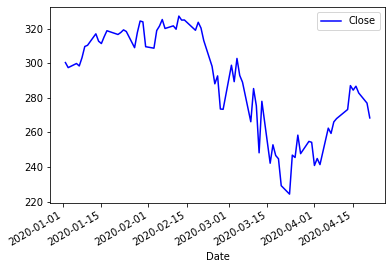

In [23]:
%matplotlib inline ##This is called as line magic or cell magic
df.plot(y="Close",color="Blue")

## Dealing with Line magic and Cell Magics


In [24]:
%lsmagic # list all available line and cell magics

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [25]:
%time? # Help command to under the method/Functionb

In [27]:
%time print("hiii")

hiii
Wall time: 0 ns


In [28]:
!dir # ! acts as cmd of pwd (present working directory)

 Volume in drive C is Windows7_OS
 Volume Serial Number is CC96-81F4

 Directory of C:\Users\Vidya.Palagiri\Jupyter_Notebooks

22/04/2020  06:16    <DIR>          .
22/04/2020  06:16    <DIR>          ..
22/04/2020  05:50    <DIR>          .ipynb_checkpoints
22/04/2020  06:16            31,735 Notebook_tutorial.ipynb
               1 File(s)         31,735 bytes
               3 Dir(s)  161,561,178,112 bytes free


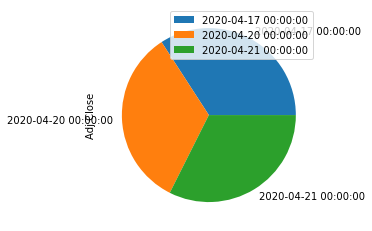

In [41]:
df.plot.pie(y="Adj Close") # Gives pie chart ,can be replaced by different charts like bar 

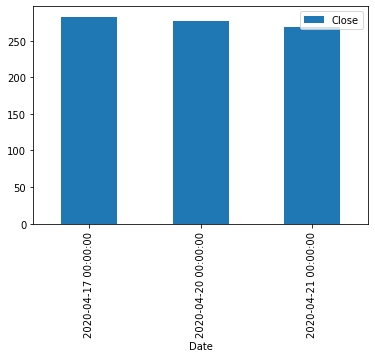

In [42]:
df.plot.bar(y="Close") # y is value from your dataframe and its casesensitive

In [133]:
df_cons =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\consumption.csv")

In [12]:
df_cons.head()

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh
0,Barking and Dagenham,2017,Domestic,Electricity,2017,261584448.5
1,Barnet,2017,Domestic,Electricity,2017,618659527
2,Bexley,2017,Domestic,Electricity,2017,371815290.2
3,Brent,2017,Domestic,Electricity,2017,424582525.8
4,Bromley,2017,Domestic,Electricity,2017,547354739.7


In [117]:
df_cons.shape

(5320, 6)

In [89]:
df_cons[5315:5350]

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh
5315,Waltham Forest,2010,Total,Total,NaN,3383505383
5316,Wandsworth,2010,Total,Total,NaN,4425063605
5317,Westminster,2010,Total,Total,NaN,9503849586
5318,Unapportioned,2010,Total,Total,NaN,366544231.8
5319,London,2010,Total,Total,NaN,1.50E+11


In [23]:
df_cons.columns

Index(['Area', 'LEGGI_Year', 'Sector', 'Fuel', 'Data_Year', 'kWh'], dtype='object')

In [26]:
df_cons['Area']

0       Barking and Dagenham
1                     Barnet
2                     Bexley
3                      Brent
4                    Bromley
                ...         
5315          Waltham Forest
5316              Wandsworth
5317             Westminster
5318           Unapportioned
5319                  London
Name: Area, Length: 5320, dtype: object

In [28]:
df_cons[['Sector','Fuel','LEGGI_Year']]

,Sector,Fuel,LEGGI_Year
0,Domestic,Electricity,2017
1,Domestic,Electricity,2017
2,Domestic,Electricity,2017
3,Domestic,Electricity,2017
4,Domestic,Electricity,2017
...,...,...,...
5315,Total,Total,2010
5316,Total,Total,2010
5317,Total,Total,2010
5318,Total,Total,2010


In [126]:
df_cons[32:36]

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh
32,Westminster,2017,Domestic,Electricity,2017,491269563.6
33,Unapportioned,2017,Domestic,Electricity,2017,-
34,London,2017,Domestic,Electricity,2017,12791222867
35,Barking and Dagenham,2017,Domestic,Gas,2017,785459208.5


In [123]:
df_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        5320 non-null   object
 1   LEGGI_Year  5320 non-null   int64 
 2   Sector      5320 non-null   object
 3   Fuel        5320 non-null   object
 4   Data_Year   4200 non-null   object
 5   kWh         5318 non-null   object
dtypes: int64(1), object(5)
memory usage: 249.5+ KB


In [124]:
#dds = ((df_cons['kWh'].str.replace('-',' ')).dropna()).to_frame
df_cons['kWh'] = (df_cons['kWh'].str.replace('-','')).dropna()

In [111]:
df_cons.shape

(5320, 6)

In [121]:
df_cons[32:36]

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh
32,Westminster,2017,Domestic,Electricity,2017,491269563.6
33,Unapportioned,2017,Domestic,Electricity,2017,
34,London,2017,Domestic,Electricity,2017,12791222867
35,Barking and Dagenham,2017,Domestic,Gas,2017,785459208.5


In [119]:
dds= df_cons[df_cons['kWh'].notnull()]

In [129]:
dds.describe

<bound method NDFrame.describe of                       Area  LEGGI_Year    Sector         Fuel Data_Year  \
0     Barking and Dagenham        2017  Domestic  Electricity      2017   
1                   Barnet        2017  Domestic  Electricity      2017   
2                   Bexley        2017  Domestic  Electricity      2017   
3                    Brent        2017  Domestic  Electricity      2017   
4                  Bromley        2017  Domestic  Electricity      2017   
...                    ...         ...       ...          ...       ...   
5315        Waltham Forest        2010     Total        Total       NaN   
5316            Wandsworth        2010     Total        Total       NaN   
5317           Westminster        2010     Total        Total       NaN   
5318         Unapportioned        2010     Total        Total       NaN   
5319                London        2010     Total        Total       NaN   

              kWh  
0     261584448.5  
1       618659527  
2    

In [131]:
ds = dds[pd.notnull(dds[['Data_Year','kWh']])]

In [132]:
ds.shape

(5318, 6)

In [135]:
df_cons =  pd.read_csv("C:\Work\PythonProjects\Jupyter_Notebooks\consumption.csv")

In [139]:
indexes = df_cons[(df_cons['kWh']=="-") ].index

In [140]:
df_cons.drop(indexes)

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh


In [141]:
df_cons

,Area,LEGGI_Year,Sector,Fuel,Data_Year,kWh
0,Barking and Dagenham,2017,Domestic,Electricity,2017,-
1,Barnet,2017,Domestic,Electricity,2017,-
2,Bexley,2017,Domestic,Electricity,2017,-
3,Brent,2017,Domestic,Electricity,2017,-
4,Bromley,2017,Domestic,Electricity,2017,-
...,...,...,...,...,...,...
5315,Waltham Forest,2010,Total,Total,NaN,-
5316,Wandsworth,2010,Total,Total,NaN,-
5317,Westminster,2010,Total,Total,NaN,-
5318,Unapportioned,2010,Total,Total,NaN,-
